In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

from src.data.rgbd import load_rgbd

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

o3d.visualization.webrtc_server.enable_webrtc()

[Open3D INFO] WebRTC GUI backend enabled.


RuntimeError: [1;31m[Open3D Error] (void open3d::visualization::gui::Application::SetWindowSystem(std::shared_ptr<open3d::visualization::gui::WindowSystem>)) /home/ctc_das/Desktop/Open3D/cpp/open3d/visualization/gui/Application.cpp:355: Cannot set WindowSystem. It is already set.
[0;m

In [ ]:
raw_data_dir = project_dir/'data/raw/render_results_imov_cam_mist_simple'

img_fpath = np.random.choice(list(raw_data_dir.glob('*/*.exr')))

# Fix distortion

Our depth channel corresponds to the distance to the camera, instead of the depth to the camera level. This was causing distortions in the point clouds.

In [96]:
f = 711.1111
cx = cy = 256

rows, cols = depth.shape
c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
c = c - cx
r = r - cy

valid = (depth > 0) & (depth < 1.5)

d_px = np.where(valid, np.sqrt(np.square(c) + np.square(r)), np.nan)  # pixel distance to (cx,cy) (image center)
z_px = np.where(valid, np.sqrt(np.square(d_px) + np.square(f)), np.nan)
z = np.where(valid, depth * f / z_px, np.nan)

x = np.where(valid, z * c / f, 0)
y = np.where(valid, z * r / f, 0)

pcd = np.dstack((x, y, z))
pcd.resize(rows*cols, 3)
pcd

array([[ 0.,  0., nan],
       [ 0.,  0., nan],
       [ 0.,  0., nan],
       ...,
       [ 0.,  0., nan],
       [ 0.,  0., nan],
       [ 0.,  0., nan]])

In [97]:
o3d.visualization.draw([
    o3d.geometry.PointCloud(o3d.utility.Vector3dVector(
        np.array([p for p in pcd if not np.isnan(p[-1])])
    ))
])

[Open3D INFO] Window window_12 created.
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.33968204479977904
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.33968204479977904
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.33968204479977904
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.33968204479977904
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.3555980353198389
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.3555980353198389
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.3555980353198389
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.3555980353198389
[Open3D INFO] Da

[6590:649][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[6590:666][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[6590:733][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[6590:738][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[6590:844][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers


[6590:861][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate


[6591:066][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[6591:079][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/call


[6591:905][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate


[6593:142][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate[Open3D INFO] [Called HTTP API] /api/hangup

[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.1052772091182983
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.1052772091182983
[Open3D INFO] Sending init frames to window_12.


[6596:155][381242] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6596:155][381242] (dtls_transport.cc:529): DtlsTransport[0|1|__]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[6596:155][381242] (dtls_transport.cc:529): DtlsTransport[0|1|R_]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate[Open3D INFO] [Called HTTP API] /api/hangup

[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/hangup


[6597:874][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate


[6602:905][381242] (stun_port.cc:308): Port[dc308260:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1138 bytes failed with error 11
[6602:905][381242] (stun_port.cc:308): Port[dc308260:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1138 bytes failed with error 11
[6602:905][381242] (stun_port.cc:308): Port[dc308260:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1138 bytes failed with error 11
[6602:905][381242] (stun_port.cc:308): Port[dc308260:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1138 bytes failed with error 11
[6602:905][381242] (stun_port.cc:308): Port[dc308260:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1138 bytes failed with error 11
[6602:905][381242] (stun_port.cc:308): Port[dc308260:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1138 bytes failed with error 11
[6602:905][381242] (stun_port.cc:308): Port[dc308260:0:1:0:local:Net[enp5s0:150.162.14.x

[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getMediaList


[6605:384][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate


[6605:671][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[6605:705][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.8950051940326322
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.8950051940326322
[Open3D INFO] Sending init frames to window_9.
[Open3D INFO] [Called HTTP API] /api/addIceCandidate[Open3D INFO] [Called HTTP API] /api/addIceCandidate

[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.22168420828607815
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open

[6633:662][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:43193 (enp5s0)
[6645:137][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:37257 (enp5s0)
[6645:424][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:48057 (enp5s0)
[6645:458][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:47936 (enp5s0)


KeyboardInterrupt: 

# Conversion from (fixed) RGBD image

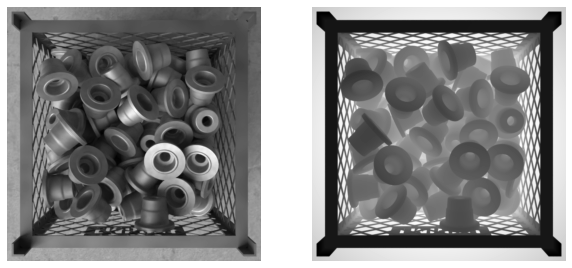

In [104]:
rgbd_img = load_rgbd(img_fpath, (256,256), 711.1111)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,10)

axs[0].imshow(rgbd_img.color, cmap='gray')
axs[1].imshow(rgbd_img.depth, cmap='gray')

axs[0].set_axis_off()
axs[1].set_axis_off()

fig.show()

In [105]:
f = 711.1111
t = 512

camera_params = o3d.camera.PinholeCameraIntrinsic(t,t,f,f,t/2,t/2)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_img, camera_params)
np.asarray(pcd.points)

array([[-0.48122302, -0.48122302,  1.3367306 ],
       [-0.4795357 , -0.48141623,  1.33726728],
       [-0.47784635, -0.48160892,  1.33780253],
       ...,
       [ 0.47634661,  0.48011219,  1.33887494],
       [ 0.47803851,  0.47992055,  1.33834052],
       [ 0.4797284 ,  0.4797284 ,  1.33780468]])

In [106]:
o3d.visualization.draw([pcd])

[Open3D INFO] Window window_13 created.
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.1052772091182983
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.1052772091182983
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.1052772091182983
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.1052772091182983
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.22168420828607815
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.22168420828607815
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.2216842

[7526:148][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getIceServers


[7526:884][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[7526:891][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[7526:892][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers


[7527:220][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/call


[7527:752][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call


[7528:439][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[7528:444][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/call


[7528:793][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/hangup


[7532:415][381242] (dtls_transport.cc:529): DtlsTransport[0|1|__]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[7532:415][381242] (dtls_transport.cc:529): DtlsTransport[0|1|__]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.
[7532:436][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.8457337121611905
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.8457337121611905
[Open3D INFO] Sending init frames to window_13.
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call


[7533:326][381242] (dtls_transport.cc:529): DtlsTransport[0|1|__]: OnWritableState() called in state DTLS_TRANSPORT_CLOSED.


[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup

[Open3D INFO] [Called HTTP API] /api/getMediaList[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/addIceCandidate



[7533:707][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[7533:707][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getMediaList


[7533:995][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[7534:090][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[7534:111][381238] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.03569460280153414
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.03569460280153414
[Open3D INFO] Sending init frames to window_9.
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.264389231591793

[7568:415][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:33302 (enp5s0)
[7568:415][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:55363 (enp5s0)
[7573:748][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:60443 (enp5s0)
[7573:842][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:60067 (enp5s0)
[7573:863][381242] (stun_port.cc:96): Binding request timed out from 150.162.14.x:43401 (enp5s0)


KeyboardInterrupt: 